# Machine Learning - Basic Concepts
- Predict Types
- Model Save & Load
- Hyperparameter Optimization
- Evaluation Methods
- Cross Validation

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Predict Types

### (1) Classification

#### Binary: Titanic dataset

In [5]:
titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

# fill NA
x_titanic_df['Age'].fillna(x_titanic_df['Age'].mean(), inplace=True)
x_titanic_df['Cabin'].fillna('N', inplace=True)
x_titanic_df['Embarked'].fillna('N', inplace=True)
x_titanic_df['Fare'].fillna(0, inplace=True)

# 머신러닝 알고리즘에 불필요한 피처 제거
x_titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Label encoding
x_titanic_df['Cabin'] = x_titanic_df['Cabin'].str[:1]
for feature in ['Cabin', 'Sex', 'Embarked']:
    le = LabelEncoder()
    le = le.fit(x_titanic_df[feature])
    x_titanic_df[feature] = le.transform(x_titanic_df[feature])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [8]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # 작은 데이터에서 유리한 solver

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


#### Multiclass: Iris dataset
- Multiclass 적용 알고리즘
    - OvR (One-versus-the-rest): 분류 시 가장 높은 결정 점수를 클래스로 결정
    - OvO (One-versus-one): 각 조합마다 이진 분류기 훈련
        - Logistic Regression, SVClassifier 등 이진 분류만 가능한 알고리즘
        - Train set의 크기에 영향을 많이 받는 알고리즘 (SVClassifier)
- Multi-label & Multi-output Classification
    - Multi-label: 하나의 케이스가 여러 label을 갖는 경우
    - Multi-label에서, label이 Multiclass의 성질을 갖는 것

In [9]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
x_train, x_test, y_train, iris_y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [12]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
### DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train) # scale 적용하지 않음

### Logistic Regression - Softmax
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(x_train_scaled, y_train)

### Linear SVC
svm_clf = LinearSVC()
svm_clf.fit(x_train_scaled, y_train)

### Bagging
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bagging_clf.fit(x_train_scaled, y_train)

### Adaboost
ada_clf = AdaBoostClassifier(base_estimator=None)
ada_clf.fit(x_train_scaled, y_train)

### Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [14]:
### Test predict
dt_iris_pred = dt_clf.predict(x_test)
lr_iris_pred = softmax_reg.predict(x_test_scaled)
svc_iris_pred = svm_clf.predict(x_test_scaled)
bagging_iris_pred = bagging_clf.predict(x_test_scaled)
ada_iris_pred = ada_clf.predict(x_test_scaled)
rnd_iris_pred = rnd_clf.predict(x_test_scaled)

print(f'Tree 예측 정확도: {round(accuracy_score(iris_y_test, dt_iris_pred), 4)}')
print(f'Logistic 예측 정확도: {round(accuracy_score(iris_y_test, lr_iris_pred), 4)}')
print(f'SVC 예측 정확도: {round(accuracy_score(iris_y_test, svc_iris_pred), 4)}')
print(f'Bagging 예측 정확도: {round(accuracy_score(iris_y_test, bagging_iris_pred), 4)}')
print(f'AdaBoost 예측 정확도: {round(accuracy_score(iris_y_test, ada_iris_pred), 4)}')
print(f'RandomForest 예측 정확도: {round(accuracy_score(iris_y_test, rnd_iris_pred), 4)}')

Tree 예측 정확도: 0.9333
Logistic 예측 정확도: 0.9333
SVC 예측 정확도: 0.7667
Bagging 예측 정확도: 0.9333
AdaBoost 예측 정확도: 0.9333
RandomForest 예측 정확도: 0.9333


In [15]:
### Confusion matrix
print(f'Tree\n{confusion_matrix(iris_y_test, dt_iris_pred)}')
print(f'Logistic\n{confusion_matrix(iris_y_test, lr_iris_pred)}')
print(f'SVC\n{confusion_matrix(iris_y_test, svc_iris_pred)}')

print(f'Bagging\n{confusion_matrix(iris_y_test, bagging_iris_pred)}')
print(f'AdaBoost\n{confusion_matrix(iris_y_test, ada_iris_pred)}')
print(f'RandomForest\n{confusion_matrix(iris_y_test, rnd_iris_pred)}')

Tree
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Logistic
[[ 8  1  0]
 [ 0 10  0]
 [ 0  1 10]]
SVC
[[8 1 0]
 [0 6 4]
 [0 2 9]]
Bagging
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
AdaBoost
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
RandomForest
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


Feature importances:[0.025 0.    0.049 0.926]
petal length (cm) : 0.025
petal width (cm) : 0.000
sepal length (cm) : 0.049
sepal width (cm) : 0.926


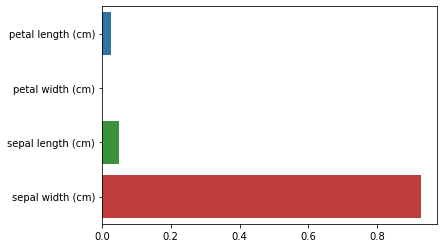

In [16]:
### Tree feature importance
print("Feature importances:{0}".format(np.round(dt_clf.feature_importances_, 3)))
for name, value in zip(iris_df.columns.difference(['label']), dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_df.columns.difference(['Class', 'label']))
plt.show()

Feature importances:[0.   0.   0.48 0.52]
petal length (cm) : 0.000
petal width (cm) : 0.000
sepal length (cm) : 0.480
sepal width (cm) : 0.520


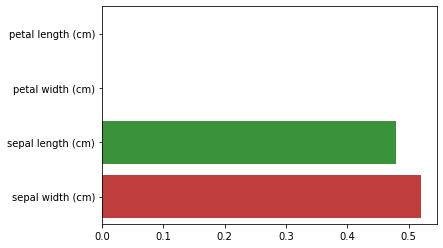

In [17]:
### AdaBoost feature importance
print("Feature importances:{0}".format(np.round(ada_clf.feature_importances_, 3)))
for name, value in zip(iris_df.columns.difference(['label']), ada_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=ada_clf.feature_importances_, y=iris_df.columns.difference(['Class', 'label']))
plt.show()

Feature importances:[0.114 0.036 0.405 0.444]
petal length (cm) : 0.114
petal width (cm) : 0.036
sepal length (cm) : 0.405
sepal width (cm) : 0.444


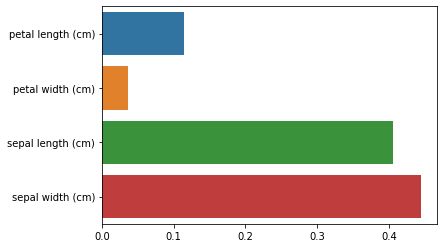

In [18]:
### RandomForest feature importance
print("Feature importances:{0}".format(np.round(rnd_clf.feature_importances_, 3)))
for name, value in zip(iris_df.columns.difference(['label']), rnd_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=rnd_clf.feature_importances_, y=iris_df.columns.difference(['Class', 'label']))
plt.show()

Class 0 coef:[-1.505  2.178 -3.096 -2.998]
petal length (cm) : -1.505
petal width (cm) : 2.178
sepal length (cm) : -3.096
sepal width (cm) : -2.998


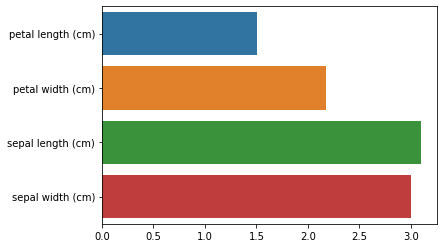

In [19]:
### Logistic Regression feature importance
# coef_의 경우 각 class에 대하여 반환되므로, 기준 변수를 설정해야 함 (Clas==0으로 설정)
print("Class 0 coef:{0}".format(np.round(softmax_reg.coef_, 3)[0]))
for name, value in zip(iris_df.columns.difference(['label']), softmax_reg.coef_[0]):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=abs(softmax_reg.coef_[0]), y=iris_df.columns.difference(['label']))
plt.show()

Class 0 coef:[-0.148  0.521 -0.585 -0.612]
petal length (cm) : -0.148
petal width (cm) : 0.521
sepal length (cm) : -0.585
sepal width (cm) : -0.612


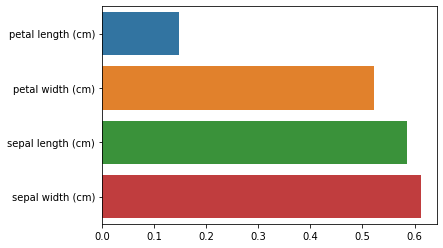

In [20]:
### SVC feature importance
# LinearSVC의 경우에만 사용 가능
print("Class 0 coef:{0}".format(np.round(svm_clf.coef_, 3)[0]))
for name, value in zip(iris_df.columns.difference(['label']), svm_clf.coef_[0]):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=abs(svm_clf.coef_[0]), y=iris_df.columns.difference(['label']))
plt.show()

In [21]:
### Class probability
# 알고리즘 특성 상 Tree는 1, 0으로 구성되고, SVC는 확률을 제공하지 않음
print(f'Tree: {dt_clf.predict_proba([[5, 2, 3, 3]])}')
print(f'Logistic: {softmax_reg.predict_proba(scaler.transform(np.array([[5, 2, 3, 3]])))}')

print(f'Bagging: {bagging_clf.predict_proba([[5, 2, 3, 3]])}')
print(f'AdaBoost: {ada_clf.predict_proba([[5, 2, 3, 3]])}')

Tree: [[0. 1. 0.]]
Logistic: [[2.94615675e-08 1.03572333e-03 9.98964247e-01]]
Bagging: [[0. 0. 1.]]
AdaBoost: [[3.18895177e-16 1.25442809e-04 9.99874557e-01]]


In [22]:
### New data predict
print(f'Tree: {dt_clf.predict([[5, 2, 3, 3]])}')
print(f'Logistic: {softmax_reg.predict(scaler.transform(np.array([[5, 2, 3, 3]])))}')
print(f'SVC: {svm_clf.predict(scaler.transform(np.array([[5, 2, 3, 3]])))}')

print(f'Bagging: {bagging_clf.predict(scaler.transform(np.array([[5, 2, 3, 3]])))}')
print(f'AdaBoost: {ada_clf.predict(scaler.transform(np.array([[5, 2, 3, 3]])))}')

Tree: [1]
Logistic: [2]
SVC: [2]
Bagging: [2]
AdaBoost: [2]


In [23]:
### OvO 또는 OvR 강제
svc = SVC(gamma="auto", random_state=42)
ovr_clf = OneVsRestClassifier(svc)
ovr_clf.fit(x_train_scaled, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [24]:
ovr_clf.estimators_

[SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42)]

In [25]:
### Multi-label
# 두 가지 label 생성
y_train_1 = (y_train <= 1)
y_train_2 = (y_train == 1)

y_test_1 = (iris_y_test <= 1)
y_test_2 = (iris_y_test == 1)

y_train_multilabel = np.c_[y_train_1, y_train_2]
y_test_multilabel = np.c_[y_test_1, y_test_2]

In [26]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_scaled, y_train_multilabel)

KNeighborsClassifier()

In [27]:
knn_pred = knn_clf.predict(x_test_scaled)

In [28]:
knn_pred[:5]

array([[False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False, False]])

In [29]:
f1_score(y_test_multilabel, knn_pred, average="macro")

0.9097826086956522

In [30]:
### Multi-output
y_train_1 = y_train
y_train_2 = (y_train == 1)

y_train_multilabel = np.c_[y_train_1, y_train_2]

In [31]:
knn_clf.fit(x_train, y_train_multilabel)
knn_pred = knn_clf.predict([x_test[2]])
knn_pred

array([[2, 0]])

### (2) Regression

#### Boston dataset

In [32]:
boston = pd.read_csv('./data/housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
boston.shape

(506, 14)

In [34]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [35]:
boston.isna().sum() # no NAs

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

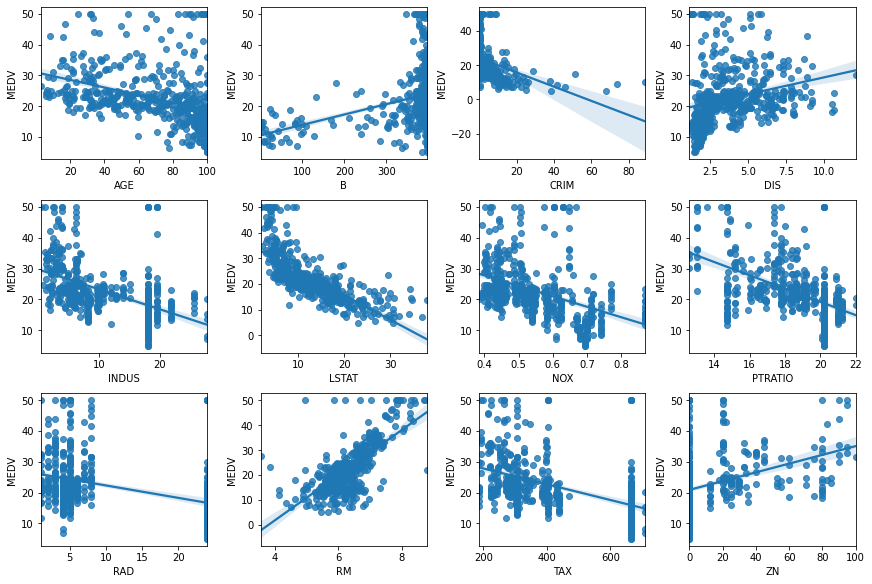

In [36]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=4, nrows=3, constrained_layout=True) # 3개의 행과 4개의 열을 가진 subplot
features = boston.columns.difference(['MEDV', 'CHAS'])
for i, feature in zip(range(12), features):
    row = i//4 # 행번호 설정
    col = i%4 # 열번호 설정
    
    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
    sns.regplot(x=feature, y=boston['MEDV'], data=boston, ax=axs[row][col])

In [37]:
boston_x = boston[features].values
boston_y = boston['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.2, random_state=42)

In [38]:
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  22.796534653465343
평가데이터세트 PRICE 평균:  21.488235294117644


In [39]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
### Linear Regression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

### Ridge
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)

### Lasso
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)

### ElasticNet
elastic = ElasticNet()
elastic.fit(x_train_scaled, y_train)

### Decision Tree
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
dt_reg.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [41]:
### Test predict
linear_pred = linear.predict(x_test_scaled)
ridge_pred = ridge.predict(x_test_scaled)
lasso_pred = ridge.predict(x_test_scaled)
elastic_pred = elastic.predict(x_test_scaled)
dt_pred = dt_reg.predict(x_test_scaled)

In [42]:
### R2-score
print(f'Linear R2-Score: {round(r2_score(y_test, linear_pred), 4)}')
print(f'Ridge R2-Score: {round(r2_score(y_test, ridge_pred), 4)}')
print(f'Lasso R2-Score: {round(r2_score(y_test, lasso_pred), 4)}')

print(f'ElasticNet R2-Score: {round(r2_score(y_test, elastic_pred), 4)}')
print(f'Tree R2-Score: {round(r2_score(y_test, dt_pred), 4)}')
print('')

### MSE
print(f'Linear MSE: {round(mean_squared_error(y_test, linear_pred), 4)}')
print(f'Ridge MSE: {round(mean_squared_error(y_test, ridge_pred), 4)}')
print(f'Lasso MSE: {round(mean_squared_error(y_test, lasso_pred), 4)}')

print(f'ElasticNet MSE: {round(mean_squared_error(y_test, elastic_pred), 4)}')
print(f'Tree MSE: {round(mean_squared_error(y_test, dt_pred), 4)}')
print('')

### MAE
print(f'Linear MAE: {round(mean_absolute_error(y_test, linear_pred), 4)}')
print(f'Ridge MAE: {round(mean_absolute_error(y_test, ridge_pred), 4)}')
print(f'Lasso MAE: {round(mean_absolute_error(y_test, lasso_pred), 4)}')

print(f'ElasticNet MAE: {round(mean_absolute_error(y_test, elastic_pred), 4)}')
print(f'Tree MAE: {round(mean_absolute_error(y_test, dt_pred), 4)}')

Linear R2-Score: 0.6641
Ridge R2-Score: 0.6737
Lasso R2-Score: 0.6737
ElasticNet R2-Score: 0.1597
Tree R2-Score: 0.7307

Linear MSE: 24.6354
Ridge MSE: 23.9316
Lasso MSE: 23.9316
ElasticNet MSE: 61.6255
Tree MSE: 19.7498

Linear MAE: 3.2372
Ridge MAE: 3.1554
Lasso MAE: 3.1554
ElasticNet MAE: 5.5432
Tree MAE: 2.8861


In [43]:
print('Linear Regression 절편 값:', linear.intercept_)
print('Linear Regression 회귀 계수값:', np.round(linear.coef_, 1))

print('Ridge 절편 값:', ridge.intercept_)
print('Ridge 회귀 계수값:', np.round(ridge.coef_, 1))

print('Lasso 절편 값:', lasso.intercept_)
print('Lasso 회귀 계수값:', np.round(lasso.coef_, 1))

print('ElasticNet 절편 값:', elastic.intercept_)
print('ElasticNet 회귀 계수값:', np.round(elastic.coef_, 1))

Linear Regression 절편 값: 24.8668423027451
Linear Regression 회귀 계수값: [ -0.5   5.1 -10.6 -16.1   1.6 -19.   -7.9  -8.9   6.6  22.1  -6.3   3.2]
Ridge 절편 값: 24.39292012479714
Ridge 회귀 계수값: [ -0.3   5.   -7.4 -12.6   0.5 -18.4  -6.1  -8.7   4.9  20.4  -4.8   2.1]
Lasso 절편 값: 25.59299088806557
Lasso 회귀 계수값: [-0.   0.  -0.   0.  -0.  -8.3 -0.  -0.  -0.   0.  -0.9  0. ]
ElasticNet 절편 값: 24.538070324325698
ElasticNet 회귀 계수값: [-0.4  0.2 -0.   0.  -0.7 -1.3 -0.4 -0.8 -0.9  0.7 -1.   0. ]


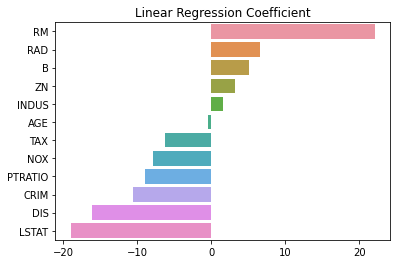

In [44]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(linear.coef_, 1), index=features).sort_values(ascending=False)
plt.title('Linear Regression Coefficient')
sns.barplot(x=coeff.values, y=coeff.index)
plt.show()

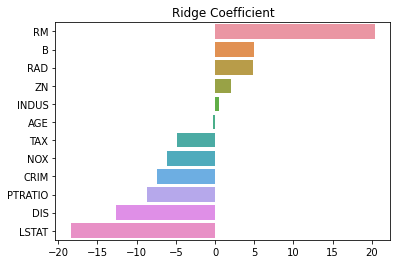

In [45]:
coeff = pd.Series(data=np.round(ridge.coef_, 1), index=features).sort_values(ascending=False)
plt.title('Ridge Coefficient')
sns.barplot(x=coeff.values, y=coeff.index)
plt.show()

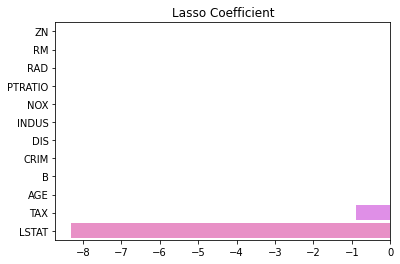

In [46]:
coeff = pd.Series(data=np.round(lasso.coef_, 1), index=features).sort_values(ascending=False)
plt.title('Lasso Coefficient')
sns.barplot(x=coeff.values, y=coeff.index)
plt.show()

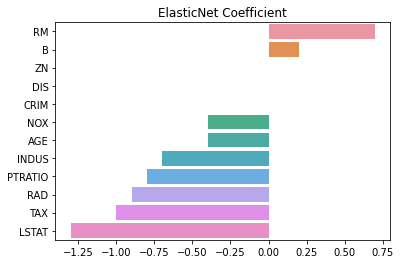

In [47]:
coeff = pd.Series(data=np.round(elastic.coef_, 1), index=features).sort_values(ascending=False)
plt.title('ElasticNet Coefficient')
sns.barplot(x=coeff.values, y=coeff.index)
plt.show()

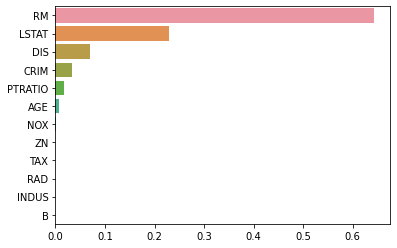

In [48]:
### Decision Tree: Feature importance
feature_series = pd.Series(data=dt_reg.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
plt.show()

In [49]:
### New data predict
print(f'Linear Regression: {linear.predict([x_test[0]])}')
print(f'Ridge: {ridge.predict([x_test[0]])}')
print(f'Lasso: {lasso.predict([x_test[0]])}')
print(f'ElasticNet: {elastic.predict([x_test[0]])}')
print(f'Tree: {dt_reg.predict([x_test[0]])}')

Linear Regression: [-26.02703905]
Ridge: [353.3296001]
Lasso: [-301.33319829]
ElasticNet: [-254.75540431]
Tree: [21.9]


## Model save & load

In [50]:
import joblib

In [51]:
### model save
# joblib.dump(linear, "my_model.pkl")

In [52]:
# model load
# my_model_loaded = joblib.load("my_model.pkl")

## Model Evaluation

### (1) Classification
- Multi-Class의 경우 Class 값으로 예측값이 주어지지 않는 경우가 있어, 데이터 변형이 필요할 수 있음

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

#### Accuracy
- 정답의 개수. 데이터 구성에 따라 성능이 왜곡될 가능성 있음

In [54]:
accuracy_score(y_test, lr_pred)

0.8659217877094972

#### Confusion Matrix
- Accuray의 한계점 보완

In [55]:
confusion_matrix(y_test, lr_pred)

array([[108,  10],
       [ 14,  47]])

#### Precision & Recall
- Positive 예측에 집중한 지표. Positive 중 실제 Positive 비율 / 실제 Positive 중 예측된 Positive 비율

In [56]:
### Precision
precision_score(y_test, lr_pred)

0.8245614035087719

In [57]:
### Recall
recall_score(y_test, lr_pred)

0.7704918032786885

In [58]:
### Precision & Recall, trade-offs
# predict_proba()
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [59]:
from sklearn.preprocessing import Binarizer

In [60]:
### Binarizer: 확률 값을 label 값으로 변경해 줌. np.where을 대신 써도 무방
# threshold 설정값 = 분류 결정 임곗값 
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

confusion = confusion_matrix(y_test, custom_predict)
accuracy = accuracy_score(y_test, custom_predict)
precision = precision_score(y_test, custom_predict)
recall = recall_score(y_test, custom_predict)
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [61]:
# Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

confusion = confusion_matrix(y_test, custom_predict)
accuracy = accuracy_score(y_test, custom_predict)
precision = precision_score(y_test, custom_predict)
recall = recall_score(y_test, custom_predict)
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [62]:
pred_proba_c1 = pred_proba[:, 1].reshape(-1, 1)

for custom_threshold in [0.4, 0.45, 0.50, 0.55, 0.60]:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    
    confusion = confusion_matrix(y_test, custom_predict)
    accuracy = accuracy_score(y_test, custom_predict)
    precision = precision_score(y_test, custom_predict)
    recall = recall_score(y_test, custom_predict)
    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

임곗값: 0.4
오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
 [[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
 [[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
 [[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [63]:
### precision_recall_curve
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573102 0.11636723 0.11819213 0.12102774 0.1234948 ]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


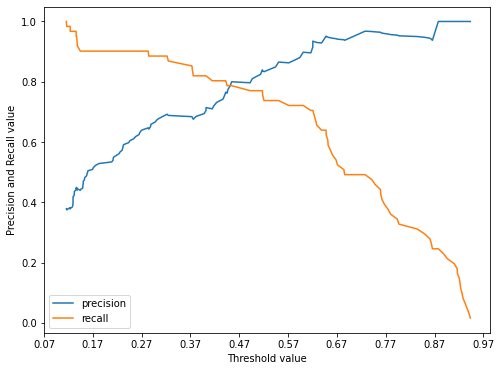

In [64]:
### Precision - Recall plot
# threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict_proba(x_test)[:, 1])
    
# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(8, 6))
threshold_boundary = thresholds.shape[0]
sns.lineplot(x=thresholds, y=precisions[0:threshold_boundary], linestyle='dashed', label='precision')
sns.lineplot(x=thresholds, y=recalls[0:threshold_boundary], label='recall')
    
# threshold 값 X 축의 Scale을 0.1 단위로 변경
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
# x축, y축 label과 legend, 그리고 grid 설정
plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
plt.legend()
plt.show()

In [65]:
### Classification report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



#### F1-Score
- Precision, Recall의 조화평균
- Multiclass에서 Score Averaging 
    - Micro-Averaging (마이크로 평균)
        - 각 클래스의 TP, FP, FN을 모두 더해 전체적으로 하나의 큰 confusion matrix를 생성
        - Precision과 Recall을 이 confusion matrix에 대해 계산한 후 F1 스코어 계산
        - 모든 클래스의 예측과 실제 값들을 하나로 합쳐서 계산하기 때문에, 클래스 간 밸런스가 중요하지 않은 경우에 유용
        - 클래스 간 샘플 수 밸런스가 필요 없으며, 모든 클래스를 하나의 큰 클래스로 취급하기 때문에 클래스 빈도에 영향을 덜 받음
        - 이진 분류에서와 마찬가지로 모든 예측과 실제값을 묶어서 계산하기 때문에, 데이터의 전체적인 성능을 확인할 수 있음
        - 클래스 간 불균형이 심한 경우에는 작은 클래스의 성능이 무시될 수 있으며, 클래스 크기가 다른 경우 각 클래스의 중요도를 반영하지 않음
    - Macro-Averaging (매크로 평균)
        - 각 클래스 별로 따로 Precision과 Recall을 계산한 후, 모든 클래스의 평균 계산
        - 클래스 간 밸런스가 중요한 경우 사용됨
        - 각 클래스의 F1 스코어가 동등한 가중치를 갖게 됨
        - 각 클래스 별로 독립적으로 평가하므로, 클래스 간 밸런스가 중요한 경우에 적합하며, 모든 클래스의 성능을 동등하게 취급하여 중요한 클래스의 성능도 고려함
        - 클래스 간 샘플 수 밸런스가 불균형한 경우, 큰 클래스가 평균에 미치는 영향이 더 크게 나타날 수 있고 클래스 크기에 상관없이 동등한 가중치를 부여하기 때문에 작은 클래스의 성능이 상대적으로 중요한 경우에는 적절하지 않음
    - Weighted-Averaging (가중 평균)
        - 클래스 별로 Precision과 Recall을 계산한 후, 각 클래스의 샘플 수를 기반으로 가중 평균 계산
        - 클래스 간 밸런스가 중요하면서 각 클래스가 다른 샘플 수를 가지는 경우에 사용
        - 클래스별로 F1 스코어를 가중하여 전체적인 성능 평가
        - 클래스 별로 샘플 수에 따라 가중치를 부여하기 때문에 클래스 간 샘플 수 및 중요도를 모두 고려할 수 있고 클래스 간 밸런스와 각 클래스의 중요도가 동시에 고려되므로 다양한 상황에 적용 가능함
        - 클래스 간 샘플 수가 크게 불균형한 경우, 작은 클래스의 성능이 무시될 수 있음. 또한 클래스 크기와 중요도를 고려하면서도, 작은 클래스의 성능을 충분히 평가하는 방법을 선택하는 것이 중요함

In [66]:
### binary
f1_score(y_test , pred)

0.7966101694915254

In [67]:
pred_proba = lr_clf.predict_proba(x_test)
pred_proba_c1 = pred_proba[:, 1].reshape(-1, 1)
for custom_threshold in [0.4, 0.45, 0.50, 0.55, 0.60]:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)

    confusion = confusion_matrix(y_test, custom_predict)
    accuracy = accuracy_score(y_test, custom_predict)
    precision = precision_score(y_test, custom_predict)
    recall = recall_score(y_test, custom_predict)
    f1 = f1_score(y_test, custom_predict)
    
    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

임곗값: 0.4
오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
 [[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
 [[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
 [[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


In [68]:
### multiclass
f1_score(iris_y_test, dt_iris_pred, average='weighted')

0.9330303030303031

#### ROC & AUC
- FPR(False Positive Rate) 대비 TPR(True Positive Rate)의 변화와 그 비율을 판단

In [69]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


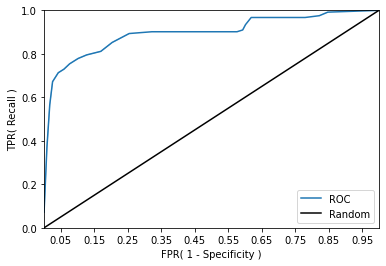

In [70]:
### ROC
# 임곗값에 따른 FPR, TPR 값을 반환 받음
fprs, tprs, thresholds = roc_curve(y_test, lr_clf.predict_proba(x_test)[:, 1])

sns.lineplot(x=fprs, y=tprs, ci=False, label='ROC')
sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='dashed', label='Random')
    
# FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

In [71]:
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, pred_proba)

0.8986524034454015

#### Gain & Lift
- 이익(Gain): 목표 범주에 속하는 개체들이 각 등급에 얼마나 분포하고 있는지 나타냄
- 향상도(Lift): 랜덤 모델 대비 얼마나 모델의 성과가 얼마나 있는지 등급별로 파악

In [72]:
# Class가 명확하게 정의된 데이터에서만 가능
### Gain table generate
def get_gain_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response': ['sum', 'count']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data']
    res_df = res_df.sort_values('group')
    res_df['individual_gain'] = res_df['num_of_response']/np.sum(y) ## 구간별 gain
    res_df['gain'] = res_df['individual_gain'].cumsum() ## gain
    
    return res_df

### Lift table generate
def get_lift_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response': ['sum', 'count', 'mean']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data', 'response_rate']
    res_df = res_df.sort_values('group')
    baseline_lift = np.sum(y)/len(y)
    res_df['lift'] = res_df['response_rate']/baseline_lift ## 구간별 gain
    
    return res_df

In [73]:
gain_df = get_gain_table(lr_clf, x_test, y_test)
gain_df

,group,num_of_response,num_of_data,individual_gain,gain
0,1,17,18,0.278689,0.278689
1,2,17,18,0.278689,0.557377
2,3,11,18,0.180328,0.737705
3,4,5,18,0.081967,0.819672
4,5,5,18,0.081967,0.901639
5,6,0,17,0.000000,0.901639
6,7,0,18,0.000000,0.901639
7,8,4,18,0.065574,0.967213
8,9,2,18,0.032787,1.000000
9,10,0,18,0.000000,1.000000


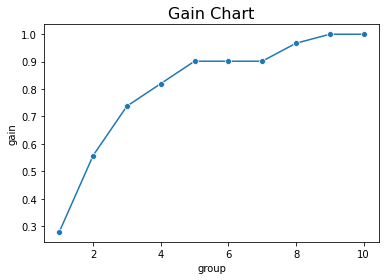

In [74]:
sns.lineplot(x=gain_df['group'], y=gain_df['gain'], marker='o')

plt.title('Gain Chart', fontsize=16)
plt.show()

In [75]:
lift_df = get_lift_table(lr_clf, x_test, y_test)
lift_df

,group,num_of_response,num_of_data,response_rate,lift
0,1,17,18,0.944444,2.771403
1,2,17,18,0.944444,2.771403
2,3,11,18,0.611111,1.793260
3,4,5,18,0.277778,0.815118
4,5,5,18,0.277778,0.815118
5,6,0,17,0.000000,0.000000
6,7,0,18,0.000000,0.000000
7,8,4,18,0.222222,0.652095
8,9,2,18,0.111111,0.326047
9,10,0,18,0.000000,0.000000


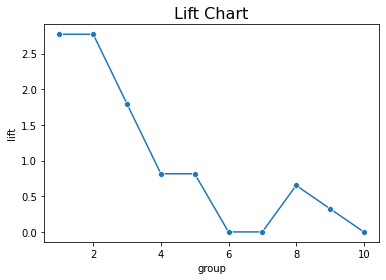

In [76]:
sns.lineplot(x=lift_df['group'], y=lift_df['lift'], marker='o')
plt.title('Lift Chart', fontsize=16)
plt.show()

### (2) Regression

In [77]:
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pred = linear.predict(x_test_scaled)

#### MAE
- Mean Absolute Error
- 에러 크기 그대로 반영. 이상치 영향 받음

In [78]:
mean_absolute_error(y_test, pred)

3.2372423618144968

#### MSE & RMSE
- Mean Squared Error
- 에러의 면적합. 이상치 영향 받음

In [79]:
### squared option으로 조정
mean_squared_error(y_test, pred, squared=False) # RMSE

4.96340549989364

#### MAPE
- Mean Absolute Percentage Error
- 오차가 예측값에서 차지하는 정도

In [80]:
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape
    
MAPE(y_test, pred)

17.339836676879013

#### R-square
- 데이터에 대한 모델의 설명 정도. 높을 수록 좋음

In [81]:
r2_score(y_test, pred)

0.664064867586112

#### MSLE
- Mean Squared Log Error

In [82]:
# mean_squared_log_error(y_test, pred)
# msle는 positive 변수일때만 사용 가능

## Cross Validation

### (1) CV Function
- cross_val_score: CV로 score 계산
- cross_val_predict: CV로 전체 데이터 예측결과 반환

In [83]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [84]:
### iris dataset
# CV로 모델 선정하기
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100, criterion="entropy") # entropy를 분류기준으로 함
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100, criterion="entropy")
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100, criterion="entropy")

scores = cross_val_score(dtree_clf_5, iris_data, iris_label, scoring='accuracy', cv=10) # dataset 10개로 분할
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_3, iris_data, iris_label, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_1, iris_data, iris_label, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [1.    0.933 1.    0.933 0.933 0.867 0.933 0.933 1.    1.   ]
평균 검증 정확도:  0.9533
교차검증 정확도:  [1.    0.933 1.    0.933 0.933 0.933 0.933 0.933 1.    1.   ]
평균 검증 정확도:  0.96
교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


In [85]:
### titanic dataset
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores))) 

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [86]:
cross_predict = cross_val_predict(dt_clf, x_titanic_df, y_titanic_df, cv=3)
cross_predict[:5]

array([0, 1, 0, 1, 0])

In [87]:
### boston dataset
neg_mse_scores = cross_val_score(linear, boston_x, boston_y, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.67 -24.28 -27.84 -82.08 -36.51]
5 folds 의 개별 RMSE scores: [3.56 4.93 5.28 9.06 6.04]
5 folds 의 평균 RMSE: 5.773


In [88]:
cross_predict = cross_val_predict(linear, boston_x, boston_y, cv=3)
cross_predict[:5]

array([30.59616695, 25.03475625, 30.25721908, 28.87001663, 27.82688016])

### (2) K-fold data
- K-fold의 결과를 활용한 CV
- Regression, Classification 모두 사용가능

In [89]:
from sklearn.model_selection import KFold, StratifiedKFold

In [90]:
### Regression
folds = 5
kfold = KFold(n_splits=folds)

# KFold 교차 검증 수행
scores = list()
for iter_count, (train_index, test_index) in enumerate(kfold.split(boston_x)):
    # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    x_train, x_test = boston_x[train_index], boston_x[test_index]
    y_train, y_test = boston_y[train_index], boston_y[test_index]
        
    # Classifier 학습, 예측, 정확도 계산 
    linear.fit(x_train, y_train) 
    rmse = mean_squared_error(y_test, linear.predict(x_test), squared=False)
    scores.append(rmse)
    print("교차 검증 {0} RMSE: {1:.4f}".format(iter_count, rmse))     
    
# 5개 fold에서의 평균 정확도 계산. 
mean_score = np.mean(scores)
print("평균 RMSE: {0:.4f}".format(mean_score)) 

교차 검증 0 RMSE: 3.5598
교차 검증 1 RMSE: 4.9279
교차 검증 2 RMSE: 5.2762
교차 검증 3 RMSE: 9.0601
교차 검증 4 RMSE: 6.0420
평균 RMSE: 5.7732


In [91]:
### Classification
scores = list()
for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
    # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
    # Classifier 학습, 예측, 정확도 계산 
    dt_clf.fit(x_train, y_train) 
    accuracy = accuracy_score(y_test, dt_clf.predict(x_test))
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
# 5개 fold에서의 평균 정확도 계산. 
mean_score = np.mean(scores)
print("평균 정확도: {0:.4f}".format(mean_score)) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [92]:
### Stratified K-Fold
# Classification 문제에만 사용가능
s_kf = StratifiedKFold(n_splits=5)

# KFold 교차 검증 수행
scores = list()
for iter_count, (train_index, test_index) in enumerate(s_kf.split(x_titanic_df, y_titanic_df)):
    # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
    # Classifier 학습, 예측, 정확도 계산 
    dt_clf.fit(x_train, y_train) 
    accuracy = accuracy_score(y_test, dt_clf.predict(x_test))
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
# 5개 fold에서의 평균 정확도 계산. 
mean_score = np.mean(scores)
print("평균 정확도: {0:.4f}".format(mean_score)) 

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


## Hyperparameter Optimization

### (1) Grid Search
- 모든 가능한 조합을 수행

In [93]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=3)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(iris_y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9667
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9333


In [96]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dclf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']].head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.958333,4,0.925,1.0,0.95
1,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.958333,4,0.925,1.0,0.95
2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.958333,4,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.958333,4,0.925,1.0,0.95
4,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.958333,4,0.925,1.0,0.95


### (2) Randomized Search
- 특정 범위에서 파라미터를 랜덤으로 선택

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
param_distribs = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [1, 2, 3, 5], 'min_samples_leaf': [1, 5, 8]}
rand_dclf = RandomizedSearchCV(dt_clf, param_distributions=param_distribs, n_iter=5, cv=5, scoring='accuracy')
rand_dclf.fit(x_train, y_train)

print('RandomizedSearch 최적 하이퍼 파라미터:', rand_dclf.best_params_)
print('RandomizedSearch 최고 정확도: {0:.4f}'.format(rand_dclf.best_score_))
best_dclf = rand_dclf.best_estimator_

# RandomizedSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

RandomizedSearch 최적 하이퍼 파라미터: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 3}
RandomizedSearch 최고 정확도: 0.9500
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8667


### (3) Bayesian Optimization

In [99]:
# !pip install hyperopt
from hyperopt import hp
from hyperopt import fmin, tpe, Trials

In [100]:
# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [101]:
# 목적 함수 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [102]:
# 입력 결과값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.RandomState(0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 1300.48it/s, best loss: -4.0]
best: {'x': 4.0, 'y': 1.0}


In [103]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.RandomState(0))

100%|██████████| 20/20 [00:00<00:00, 1513.32it/s, best loss: -264.0]


In [104]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임. 
print(trial_val.results)

[{'loss': 16.0, 'status': 'ok'}, {'loss': -4.0, 'status': 'ok'}, {'loss': 240.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': 256.0, 'status': 'ok'}, {'loss': 185.0, 'status': 'ok'}, {'loss': -100.0, 'status': 'ok'}, {'loss': -255.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': 304.0, 'status': 'ok'}, {'loss': 81.0, 'status': 'ok'}, {'loss': -19.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': 109.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': 240.0, 'status': 'ok'}, {'loss': -264.0, 'status': 'ok'}, {'loss': -124.0, 'status': 'ok'}, {'loss': 169.0, 'status': 'ok'}, {'loss': 4.0, 'status': 'ok'}]


In [105]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [4.0, 4.0, 10.0, -9.0, 6.0, -5.0, 10.0, 5.0, 1.0, 8.0, -1.0, 1.0, -10.0, -7.0, -9.0, 0.0, 6.0, 4.0, -7.0, 2.0], 'y': [-0.0, 1.0, -7.0, 1.0, -11.0, -8.0, 10.0, 14.0, 0.0, -12.0, -4.0, 1.0, 2.0, -3.0, 4.0, -12.0, 15.0, 7.0, -6.0, -0.0]}


In [106]:
# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성. 
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df.head()

,x,y,losses
0,4.0,-0.0,16.0
1,4.0,1.0,-4.0
2,10.0,-7.0,240.0
3,-9.0,1.0,61.0
4,6.0,-11.0,256.0
